### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_220 = pd.read_csv('Patient 220_data.csv')

In [3]:
patient_220.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,...,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000
mean,0.081483,0.308348,0.721601,1.313525,1.874683,2.441729,1.180034,1.025435,1.021151,1.042054,...,1.908130,1.494483,2.060921,2.048971,1.113747,1.707910,2.071878,2.009707,1.960309,40.558145
std,0.015031,0.020059,0.010310,0.021998,0.055229,1.896316,0.035870,0.004206,0.002977,0.022708,...,0.027135,0.053797,0.015366,0.028115,0.071863,0.042579,0.002594,0.005789,0.047282,10.785765
min,0.020922,0.254241,0.695636,1.294744,1.706670,1.389770,1.116568,1.014420,1.005323,0.999902,...,1.657910,1.290037,1.812590,1.917688,0.571800,1.383095,2.033399,1.978994,1.745249,20.800000
25%,0.081058,0.294116,0.717329,1.303288,1.837701,1.698226,1.159806,1.022936,1.020749,1.028262,...,1.893182,1.467558,2.059973,2.033293,1.103469,1.683678,2.071710,2.006820,1.937730,33.800000
50%,0.087018,0.306708,0.720712,1.305466,1.874031,1.912326,1.168846,1.024392,1.021930,1.043174,...,1.908195,1.490337,2.064234,2.057851,1.138309,1.706521,2.072326,2.009479,1.971828,39.600000
75%,0.090038,0.320035,0.724205,1.308829,1.911964,2.378123,1.184642,1.026551,1.022917,1.056904,...,1.923764,1.515777,2.066959,2.072014,1.154192,1.734029,2.072820,2.012293,1.992765,44.400000
max,0.103393,0.380950,0.760838,1.405843,1.989808,17.712824,1.425481,1.048275,1.027053,1.112760,...,1.980339,1.738145,2.074330,2.079417,1.205301,1.821225,2.074706,2.068761,2.036045,97.300000


In [4]:
X=patient_220.drop('BIS', axis=1)
y= patient_220['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

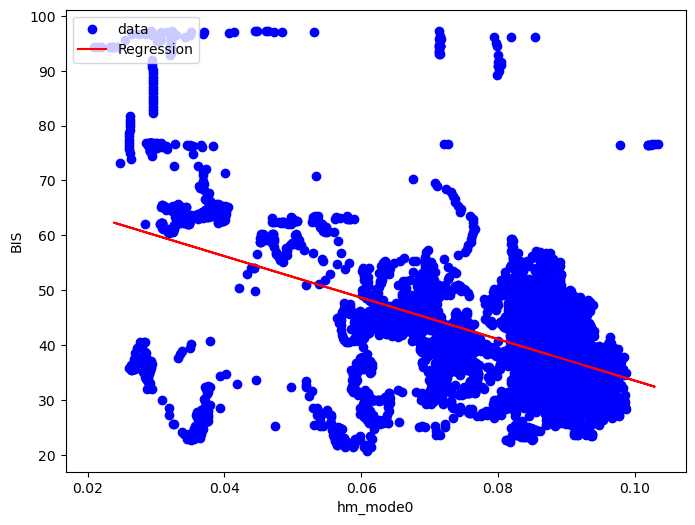

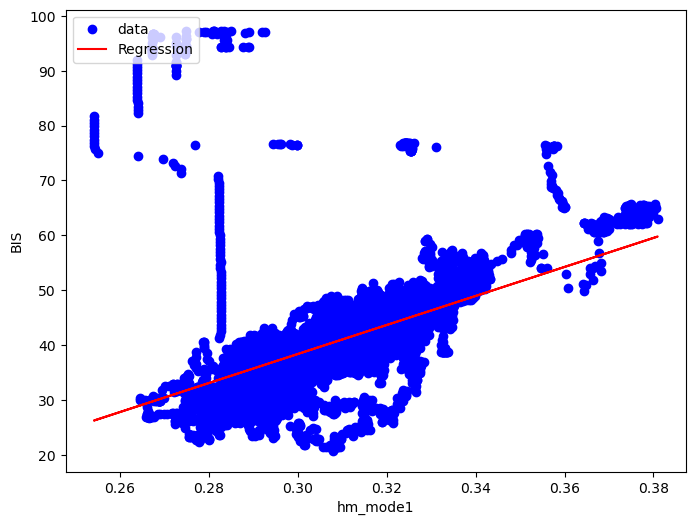

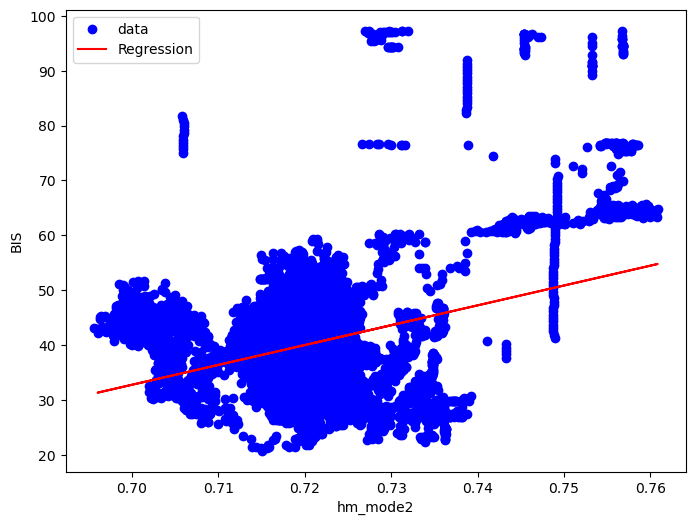

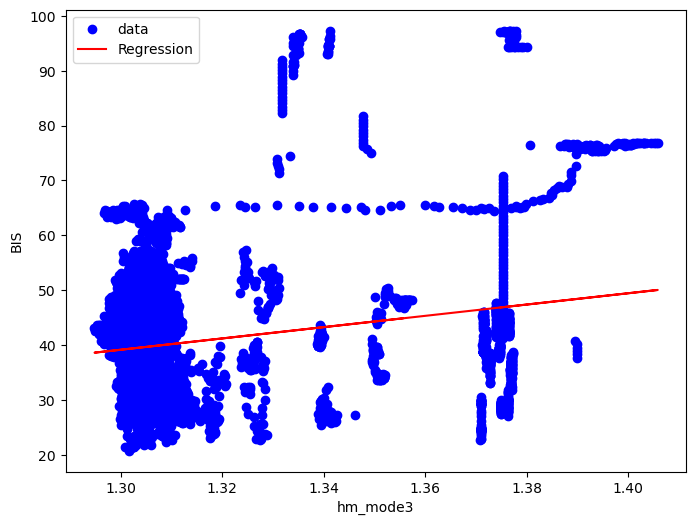

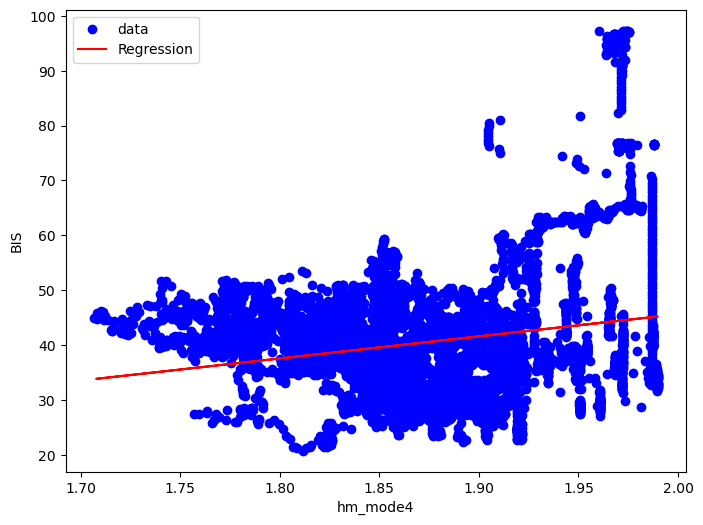

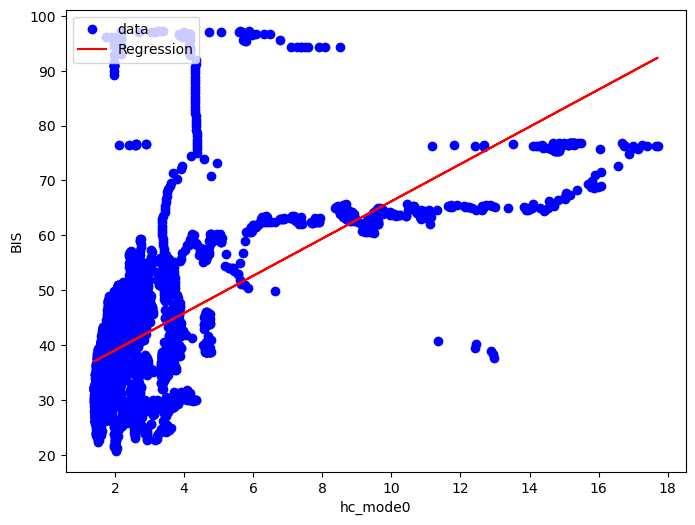

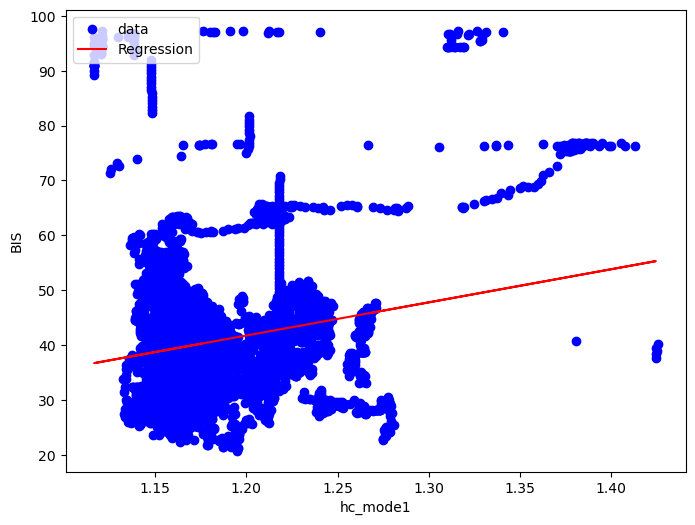

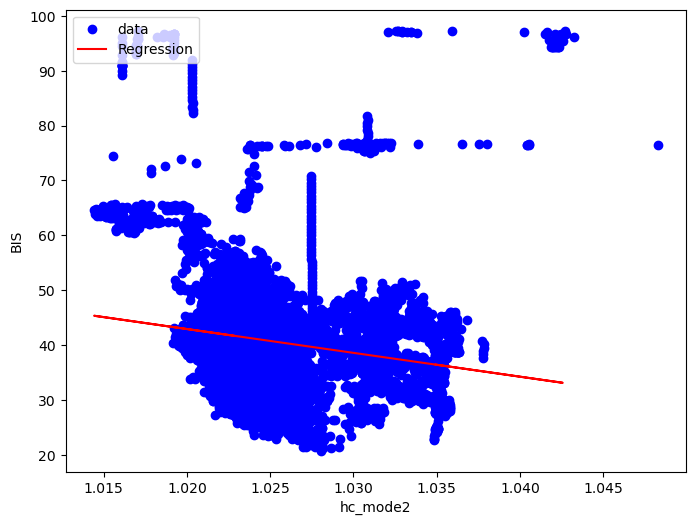

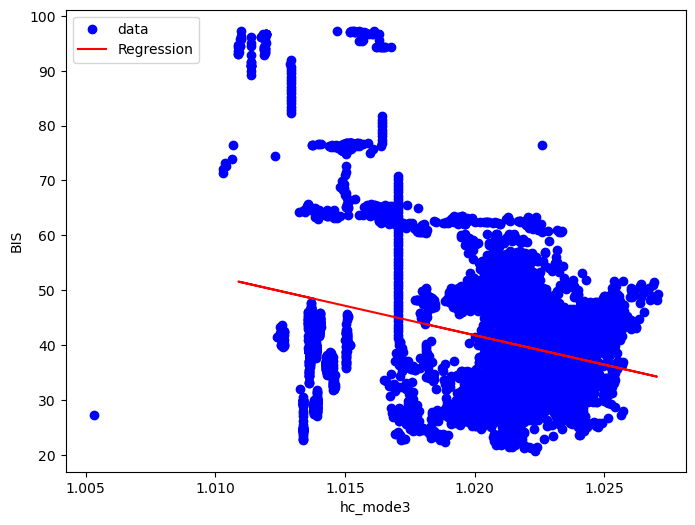

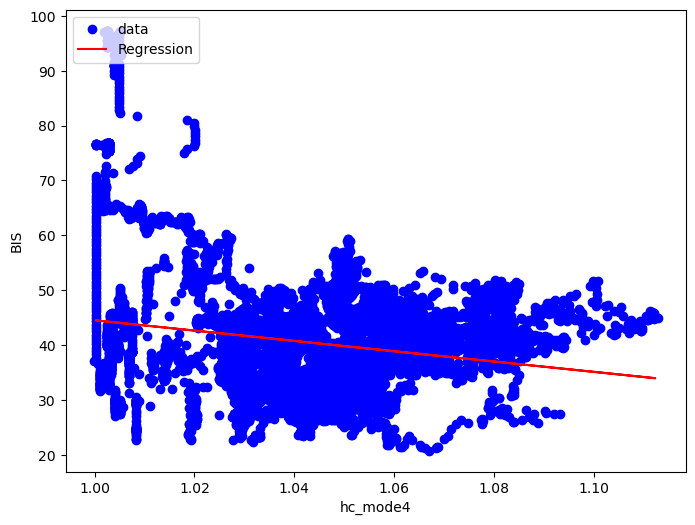

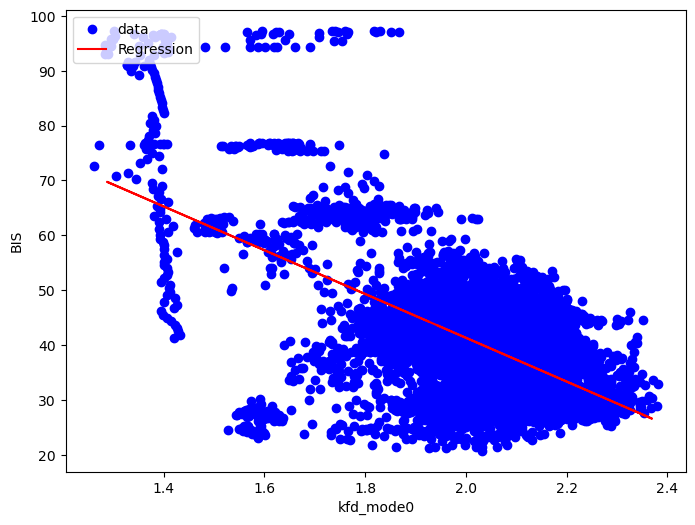

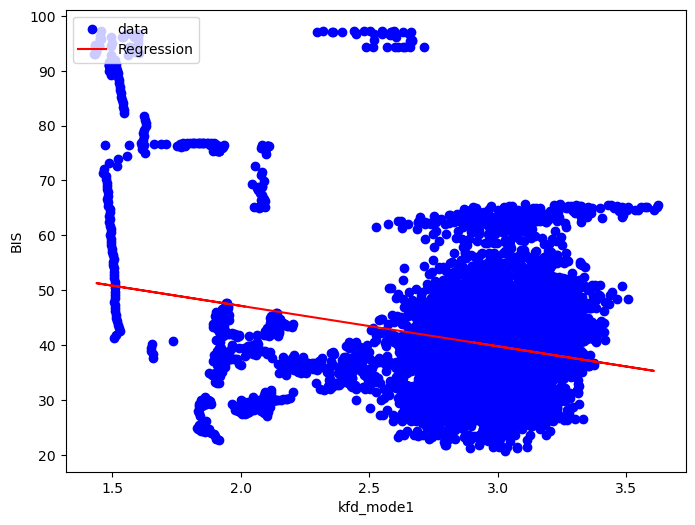

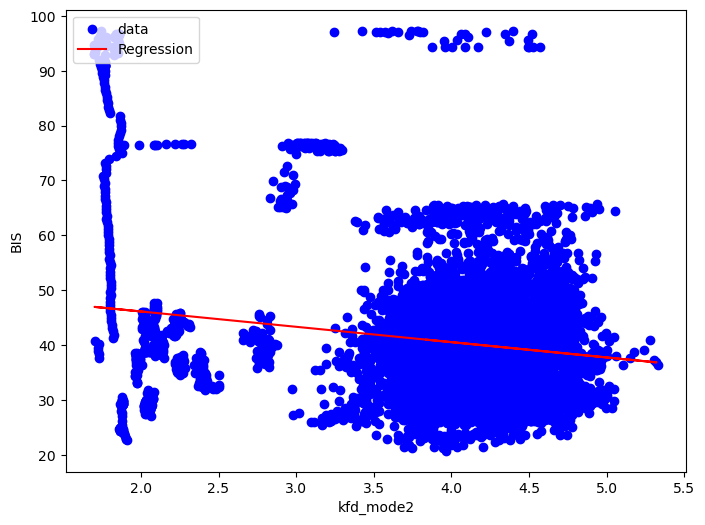

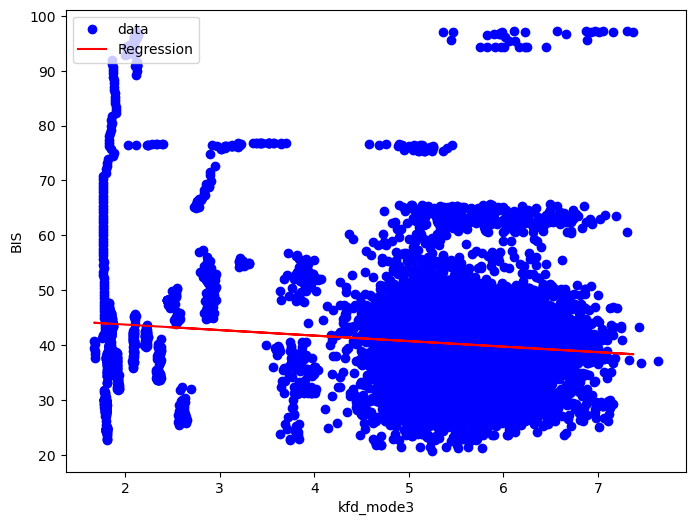

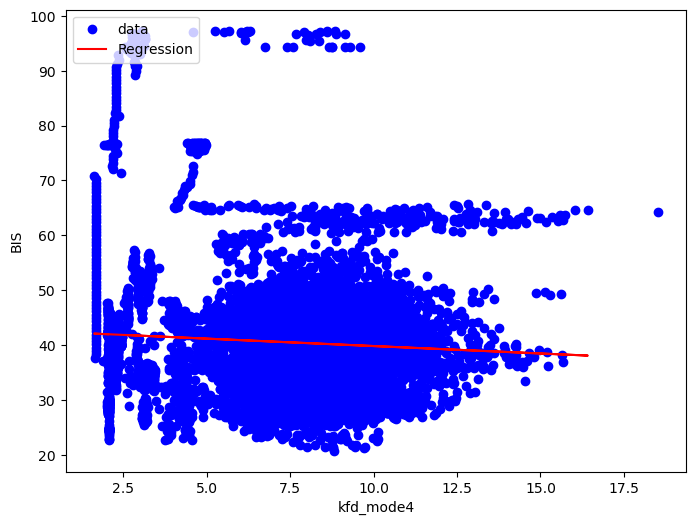

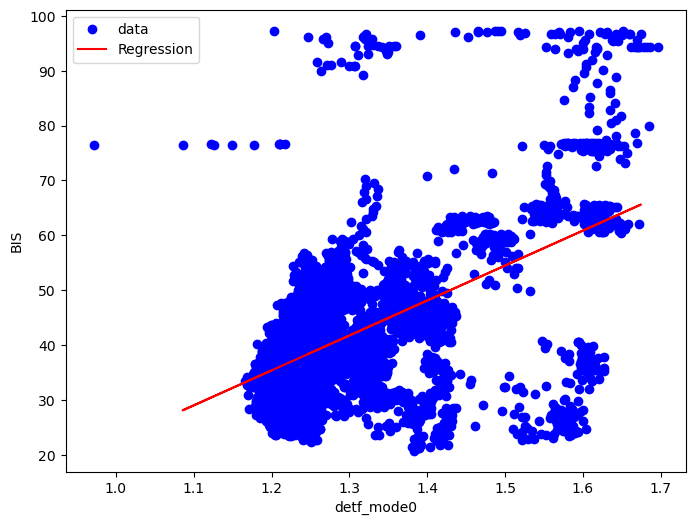

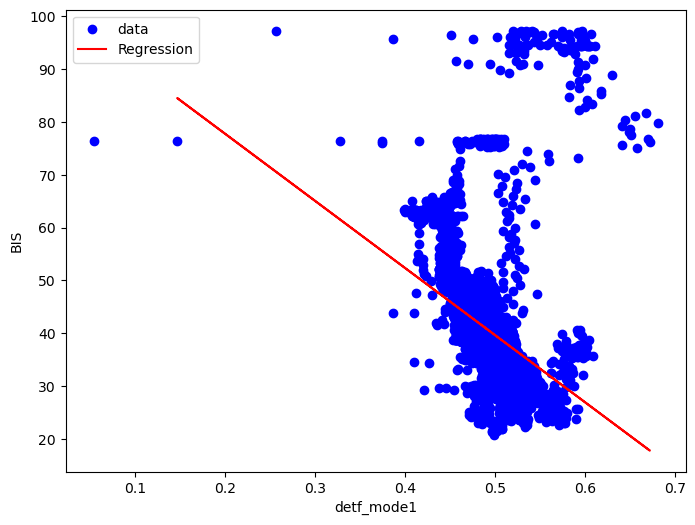

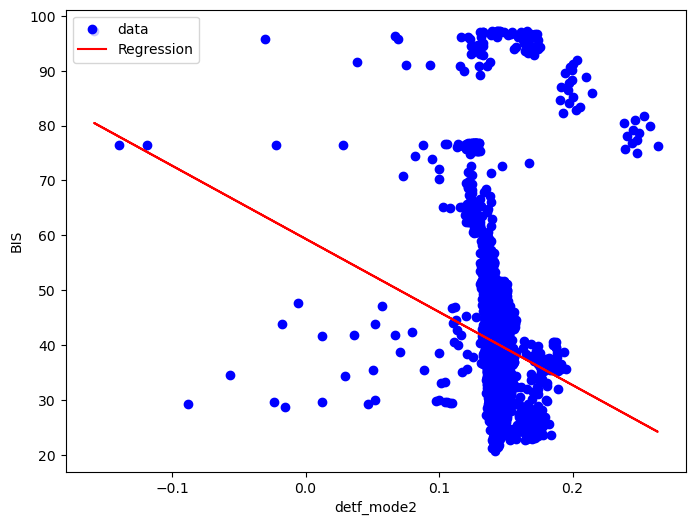

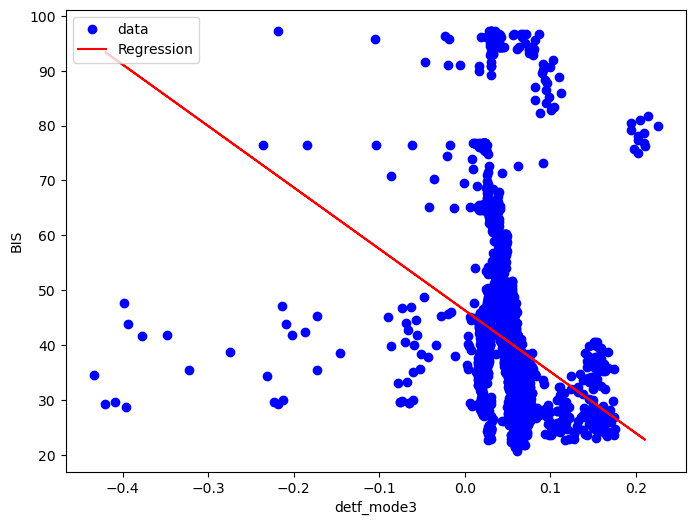

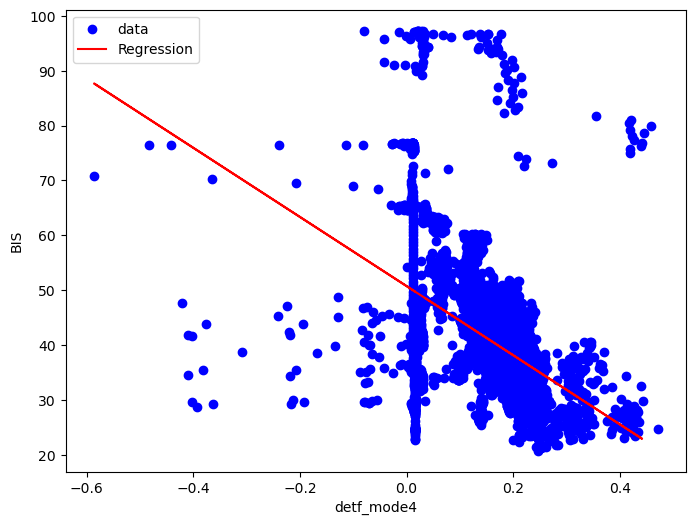

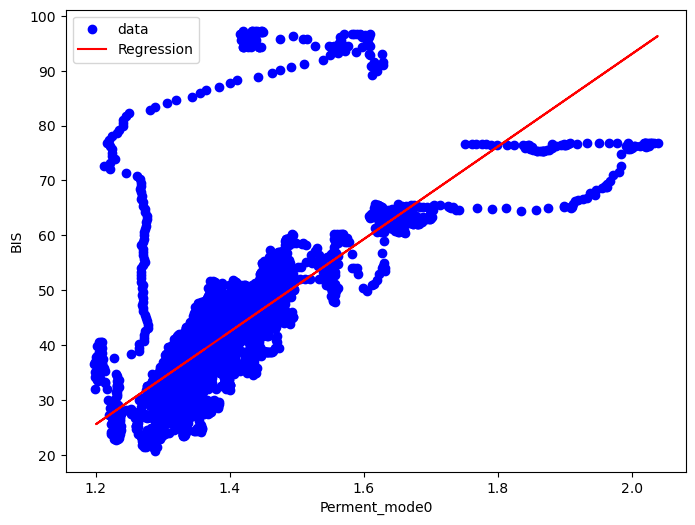

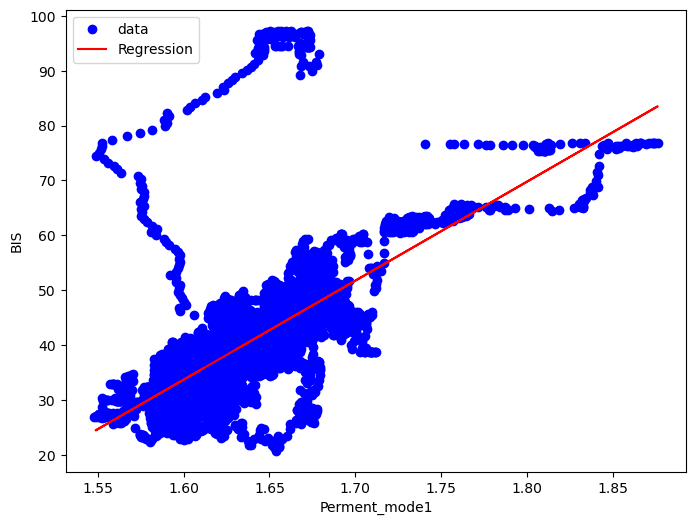

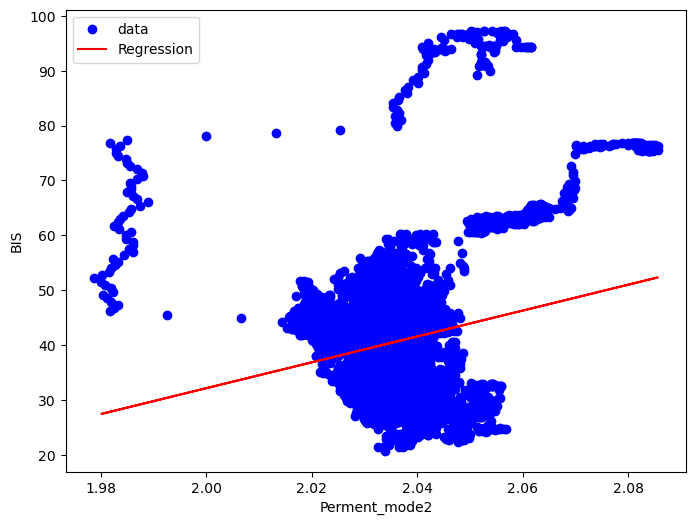

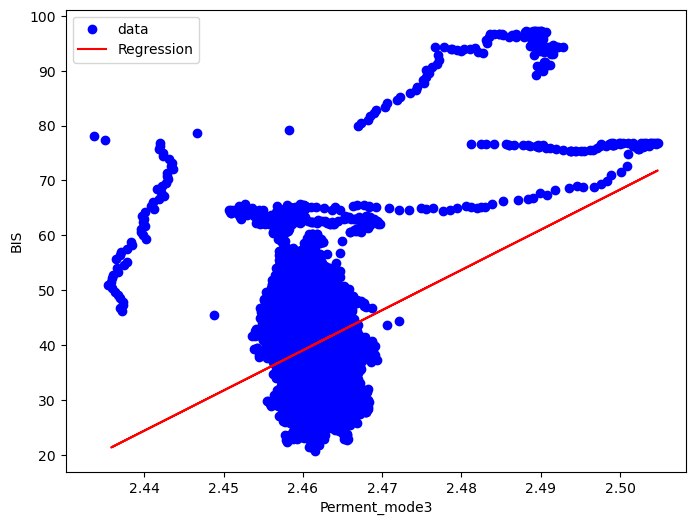

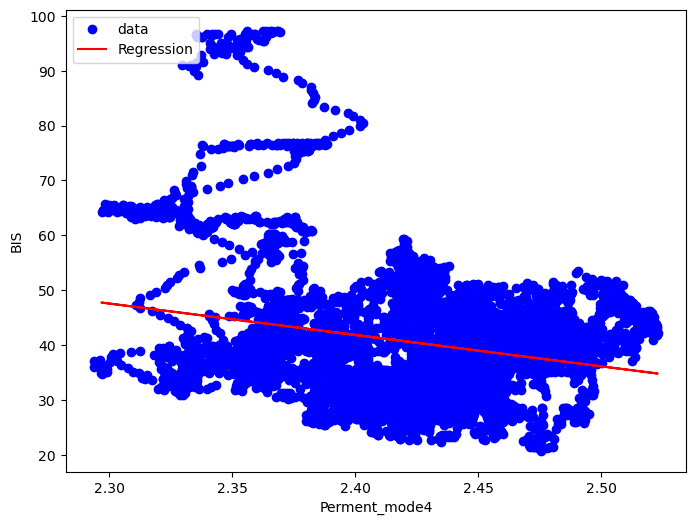

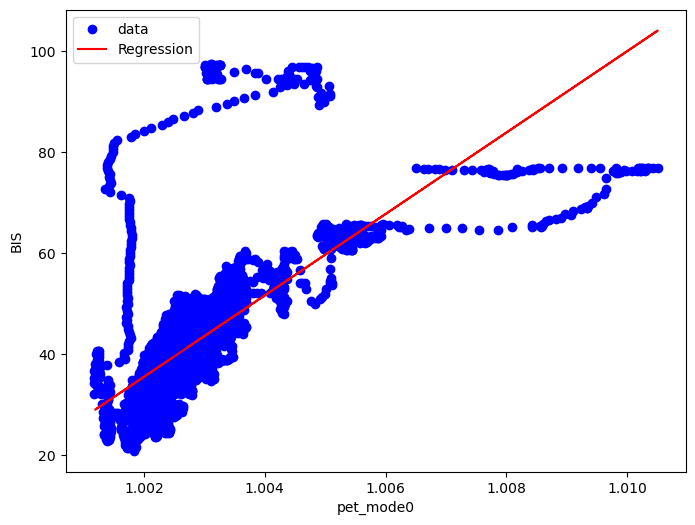

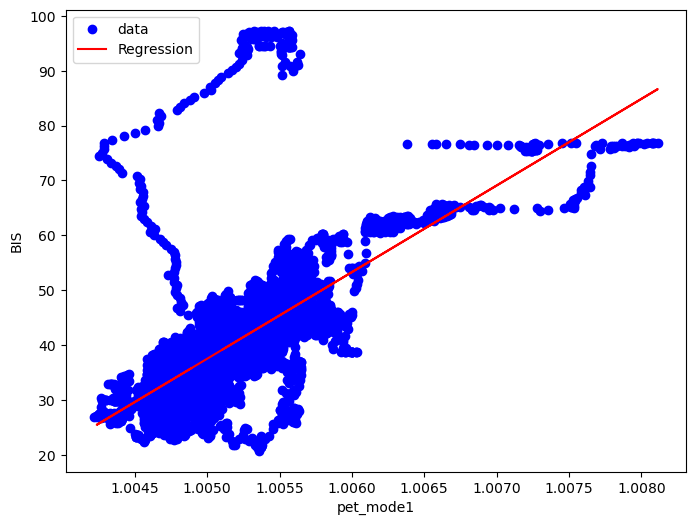

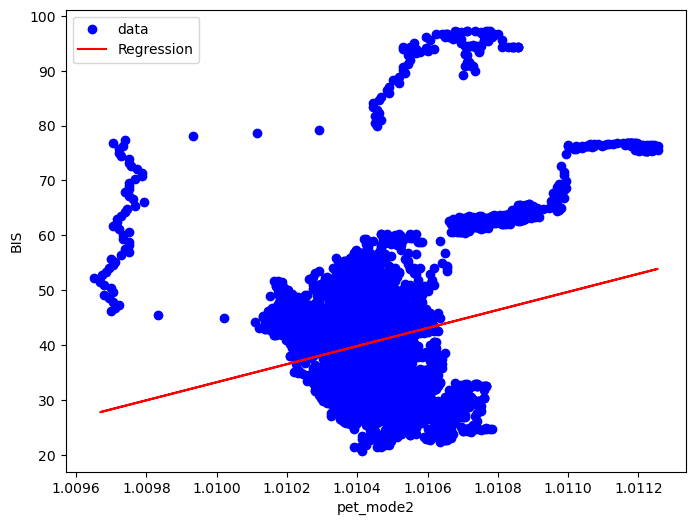

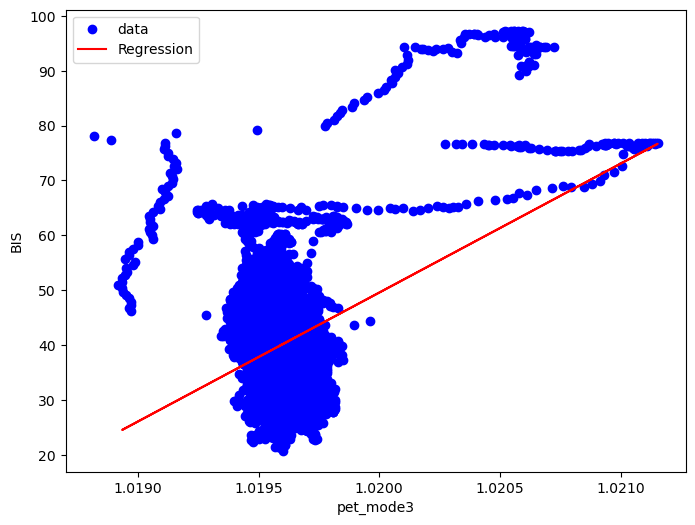

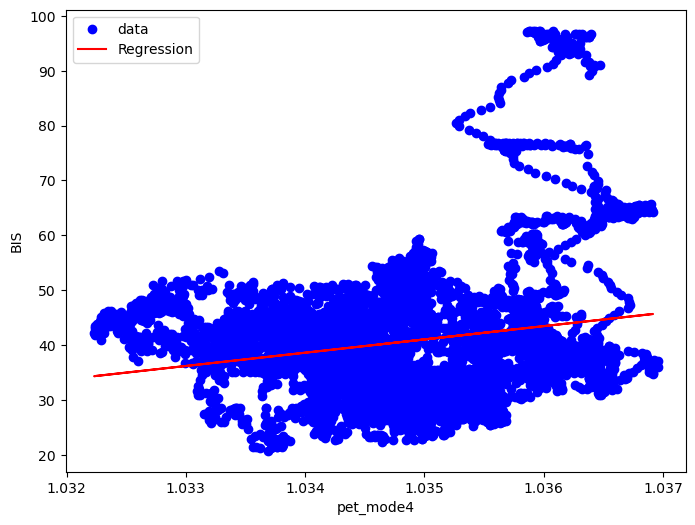

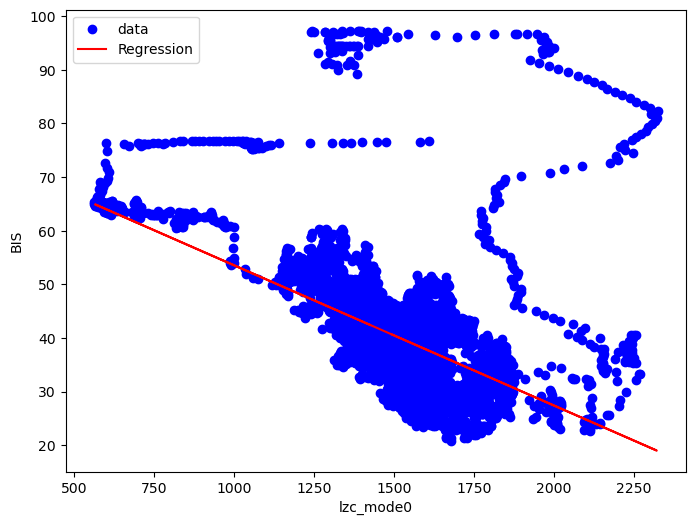

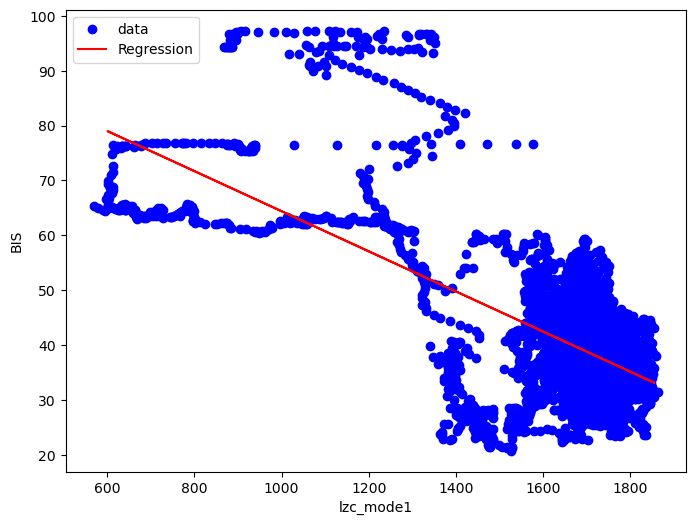

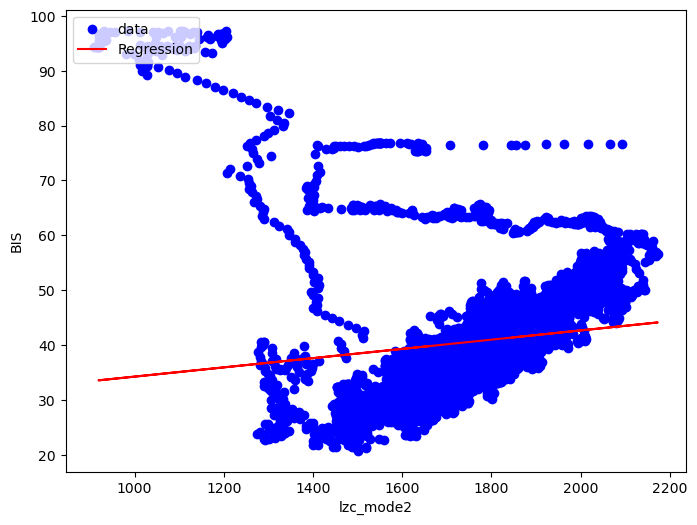

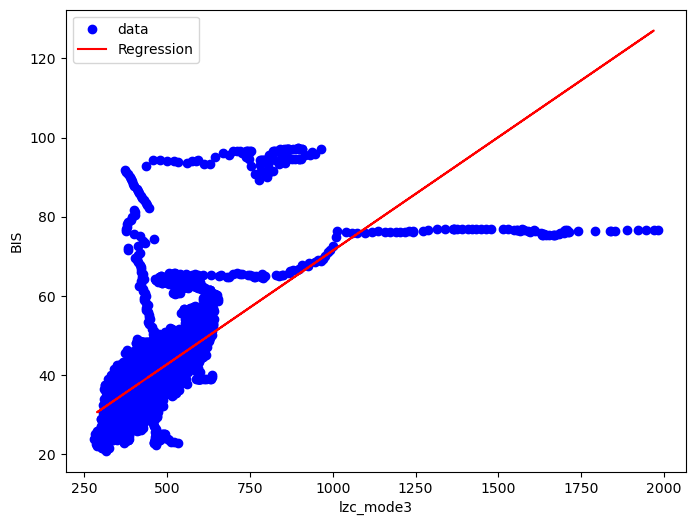

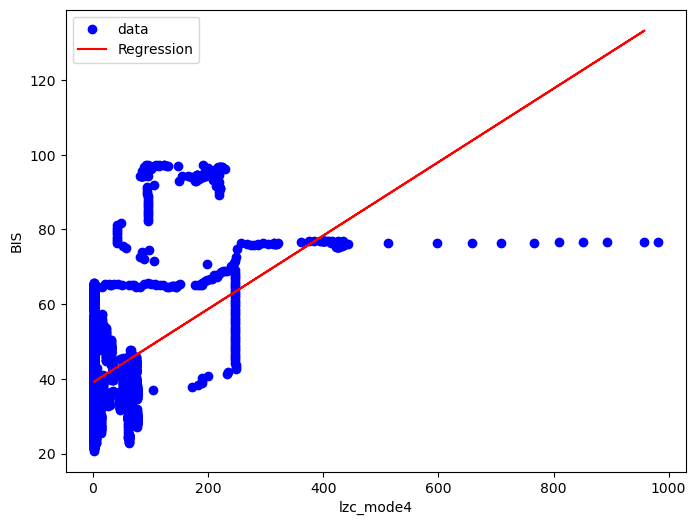

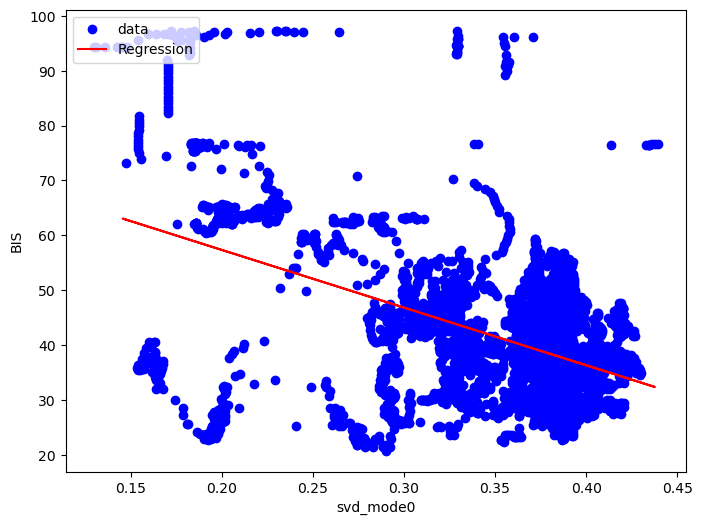

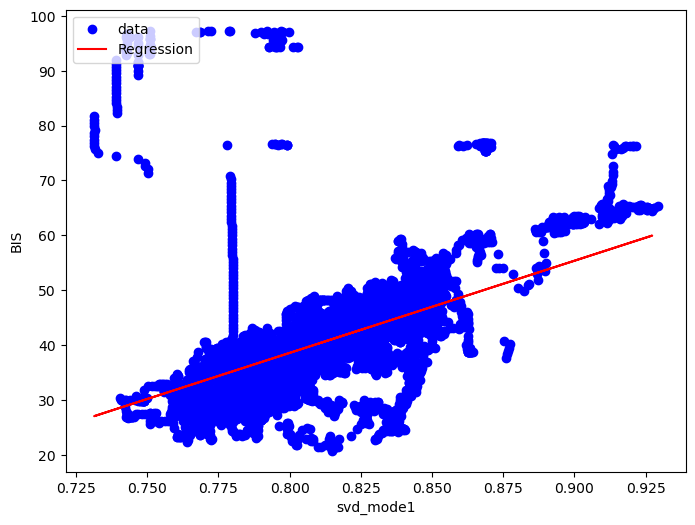

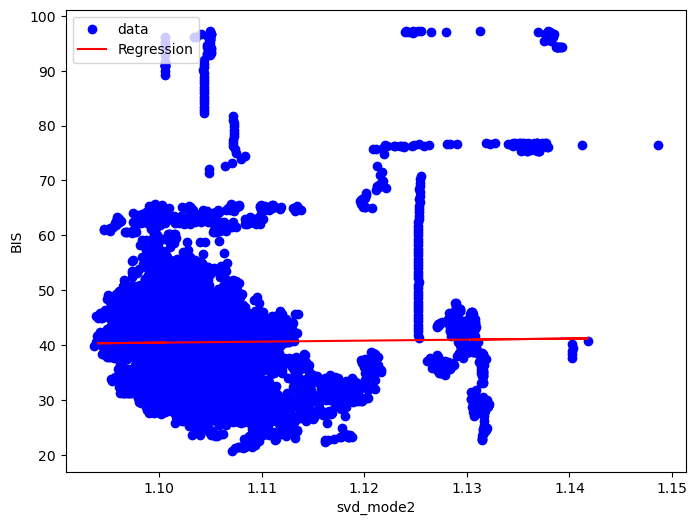

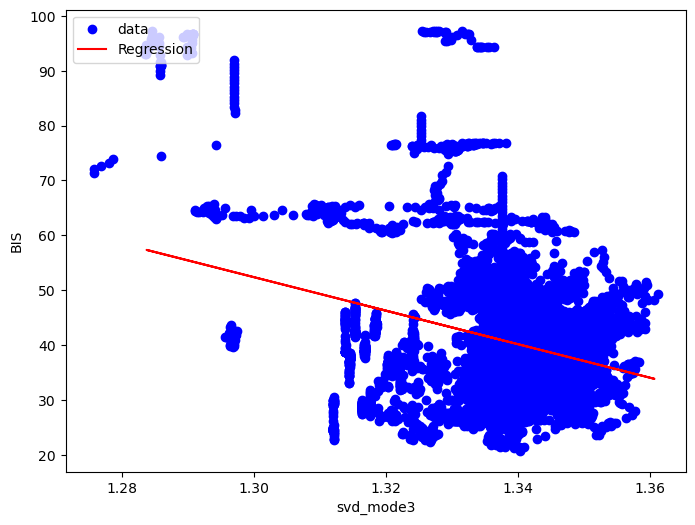

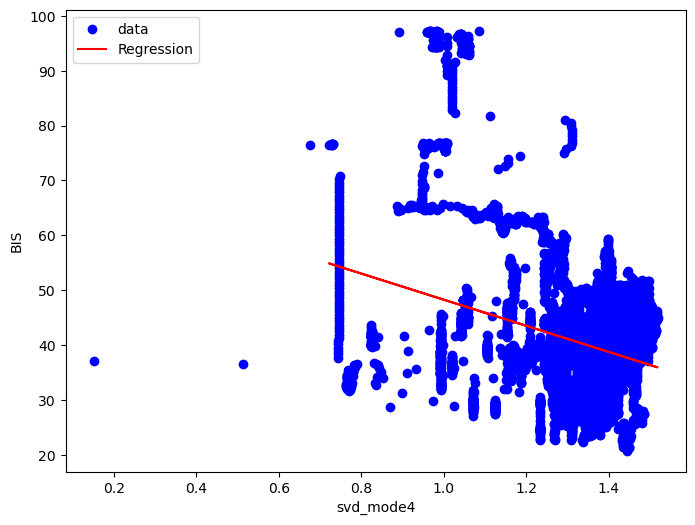

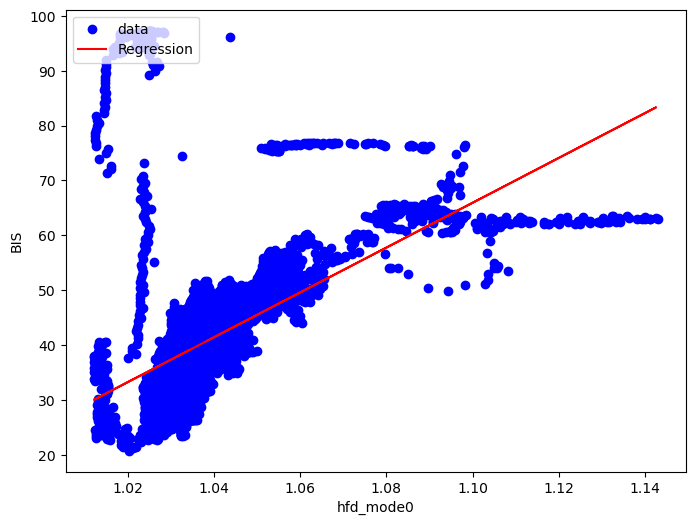

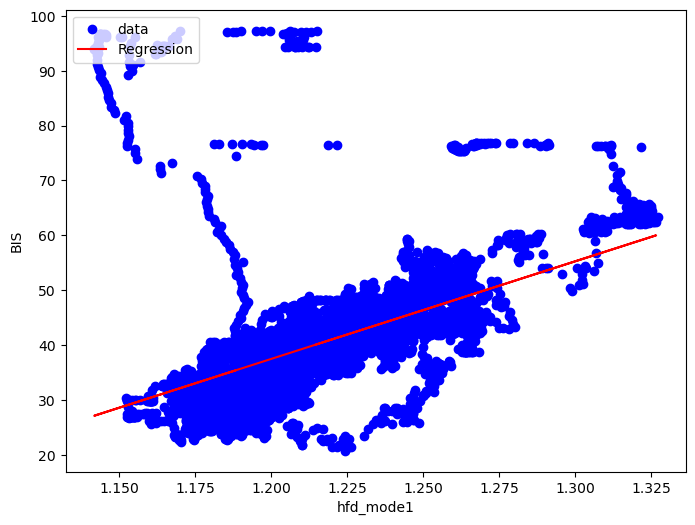

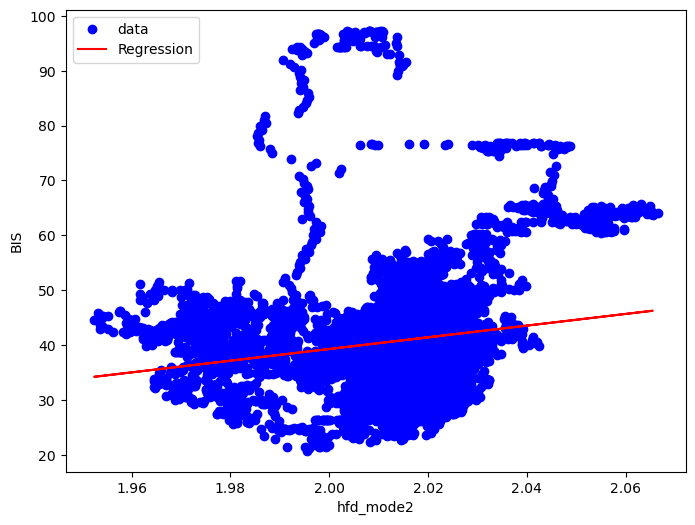

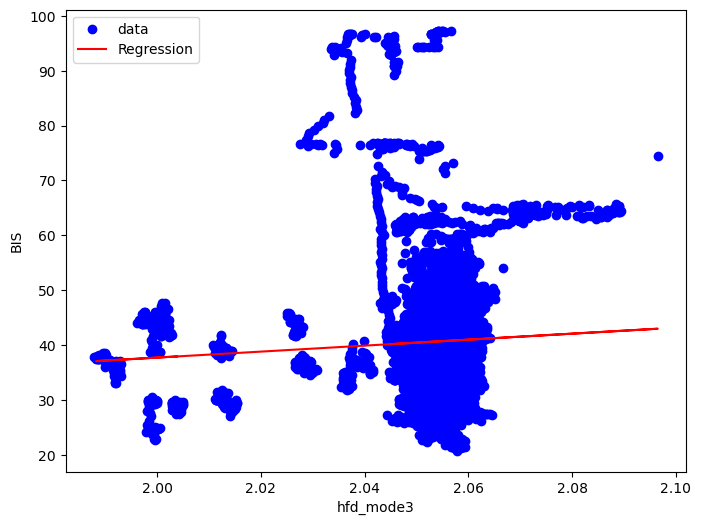

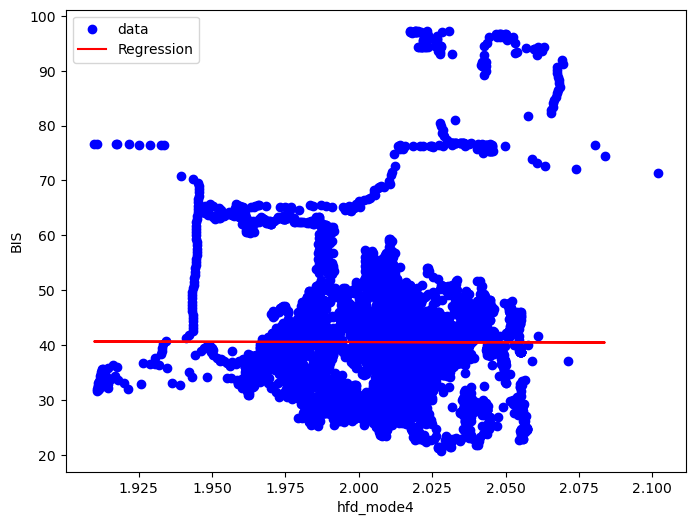

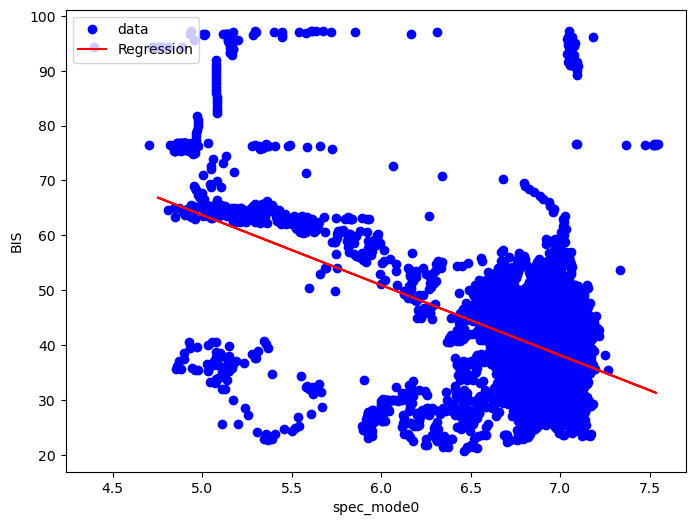

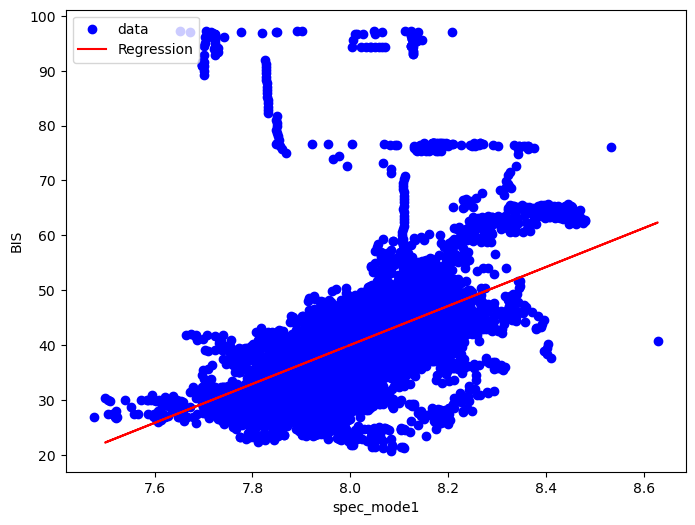

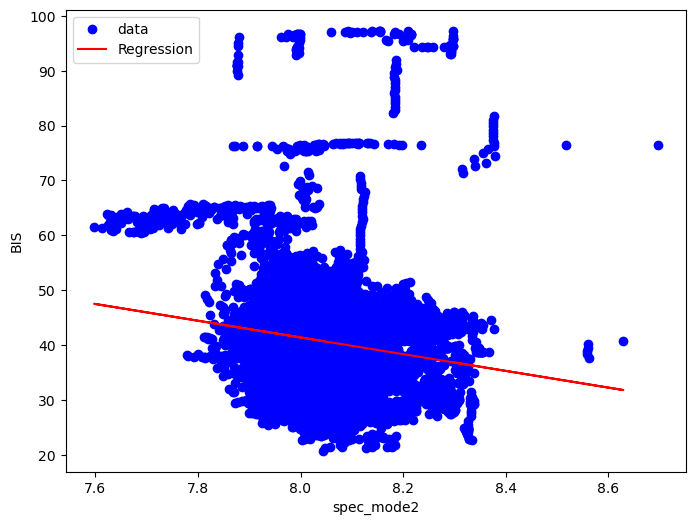

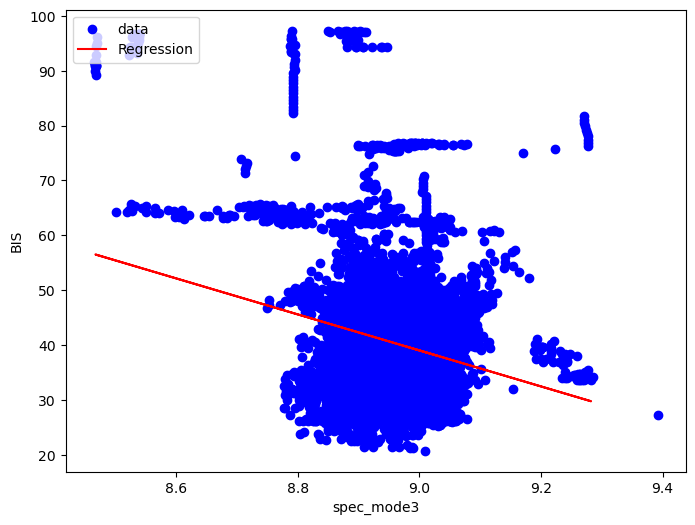

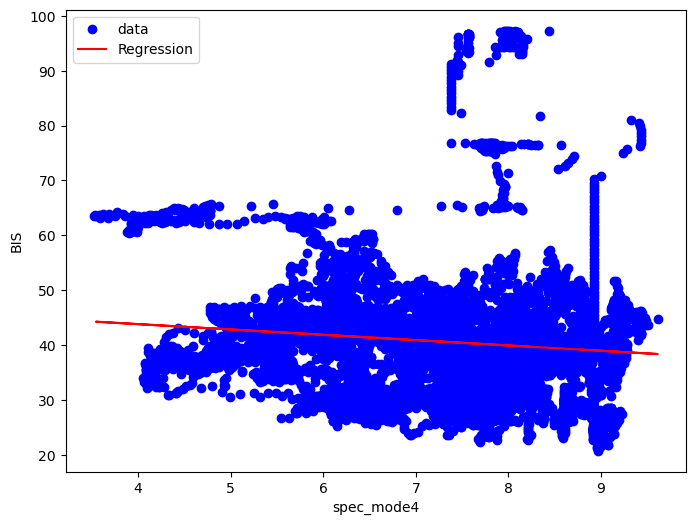

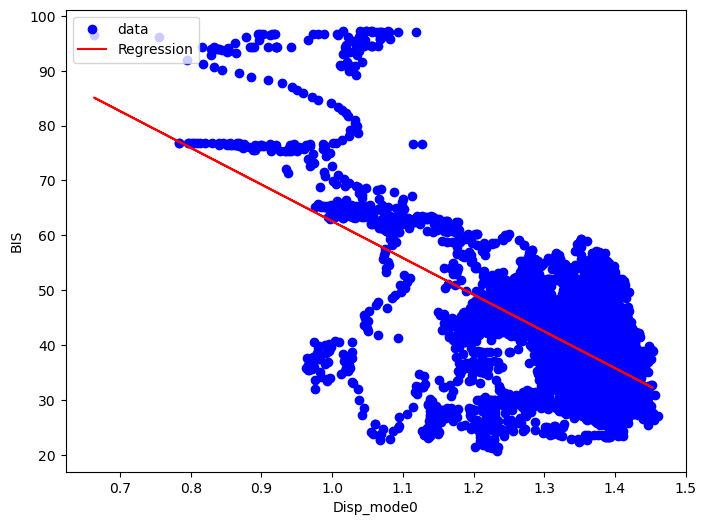

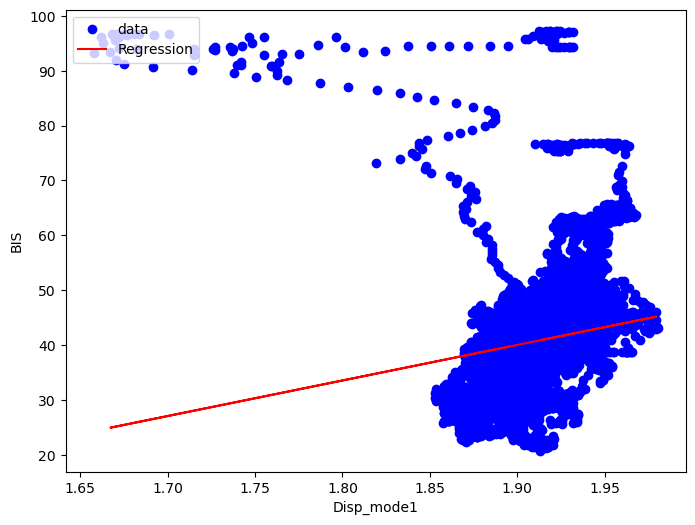

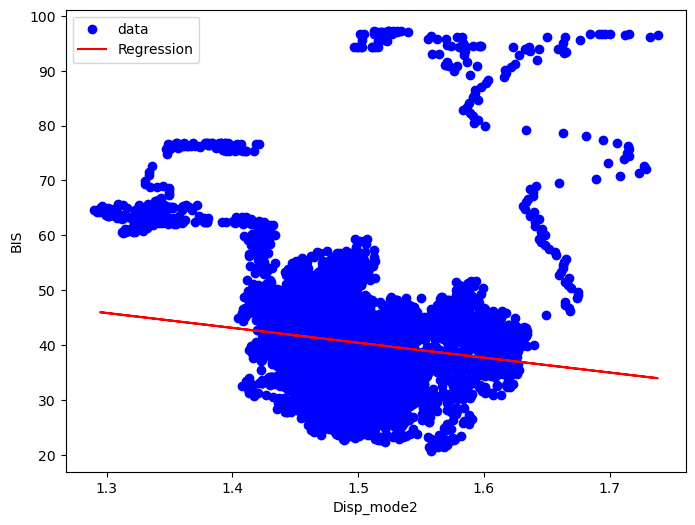

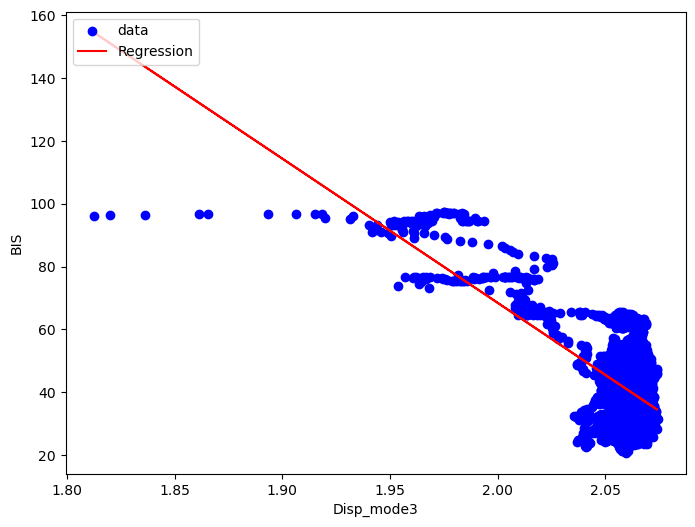

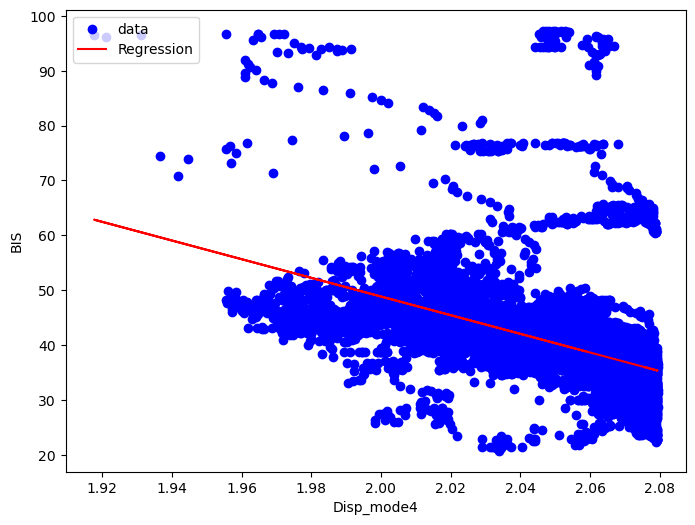

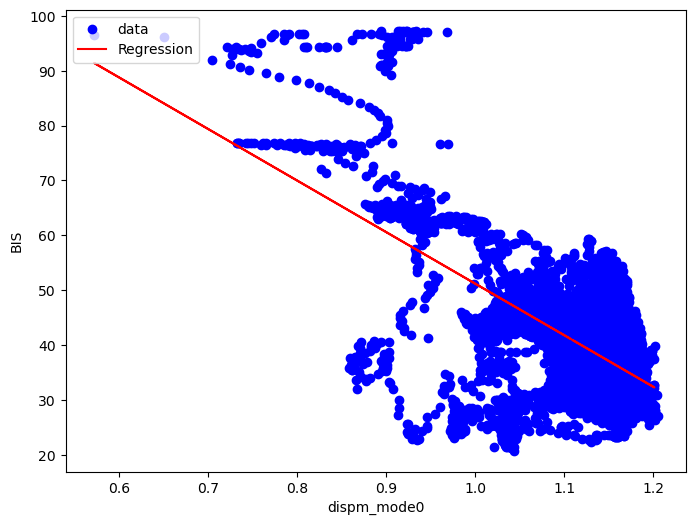

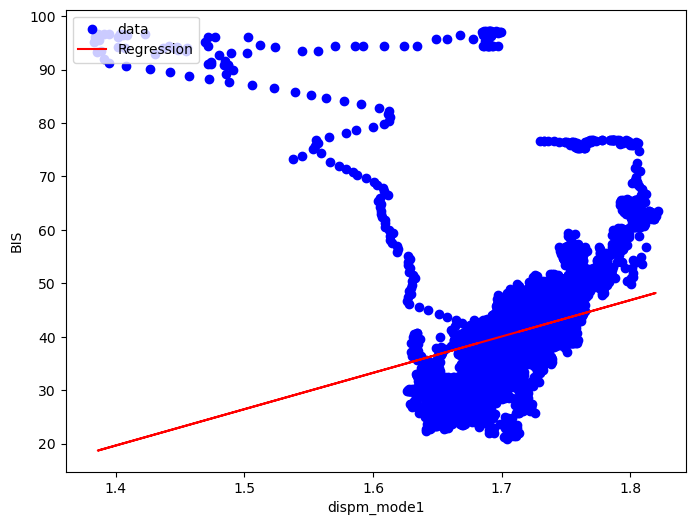

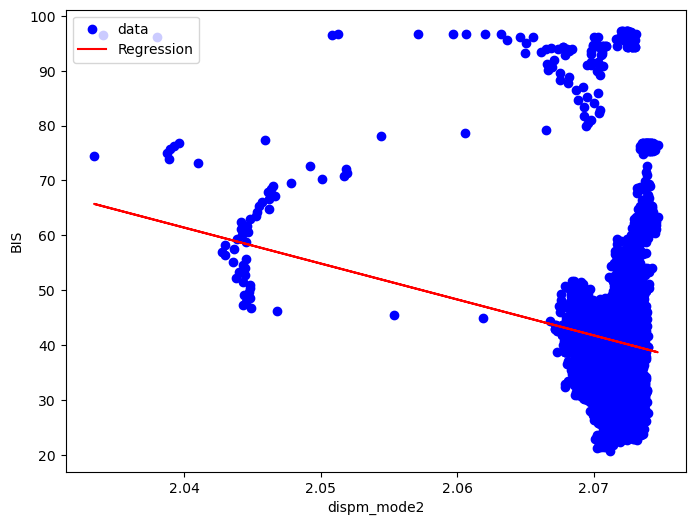

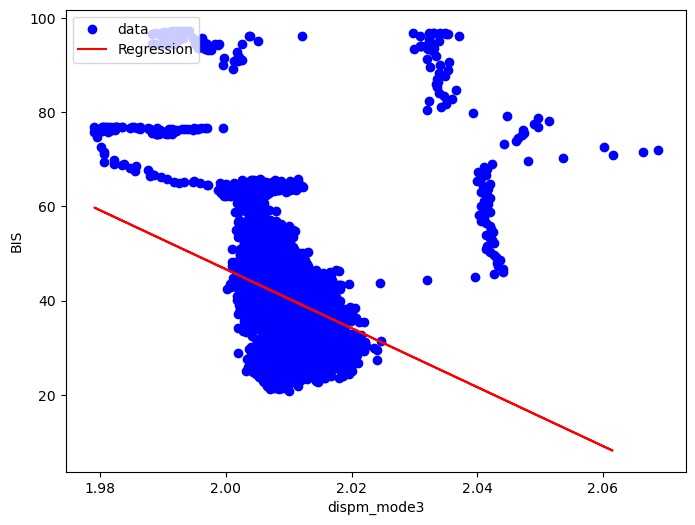

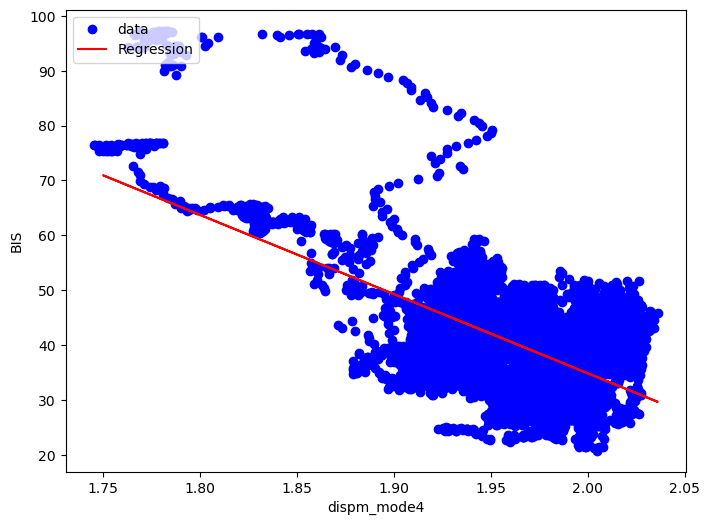

In [6]:

for column in patient_220.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_220, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
20,Perment_mode0_r2,56.104370
25,pet_mode0_r2,53.085362
26,pet_mode1_r2,49.458555
21,Perment_mode1_r2,49.386635
33,lzc_mode3_r2,47.070629
50,Disp_mode0_r2,40.428049
55,dispm_mode0_r2,39.738718
31,lzc_mode1_r2,39.690703
59,dispm_mode4_r2,38.115798
5,hc_mode0_r2,36.199775


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
31      lzc_mode1    0.487729
32      lzc_mode2    0.333255
40      hfd_mode0    0.018000
5        hc_mode0    0.016241
44      hfd_mode4    0.014659
30      lzc_mode0    0.011132
59    dispm_mode4    0.009074
53     Disp_mode3    0.007705
49     spec_mode4    0.005454
56    dispm_mode1    0.005371
17     detf_mode2    0.005342
1        hm_mode1    0.005114
3        hm_mode3    0.004950
36      svd_mode1    0.004934
10      kfd_mode0    0.004296
21  Perment_mode1    0.003987
54     Disp_mode4    0.003621
18     detf_mode3    0.003565
4        hm_mode4    0.003521
52     Disp_mode2    0.002876
33      lzc_mode3    0.002390
55    dispm_mode0    0.002283
58    dispm_mode3    0.002270
9        hc_mode4    0.002179
20  Perment_mode0    0.001897
19     detf_mode4    0.001869
16     detf_mode1    0.001823
2        hm_mode2    0.001772
37      svd_mode2    0.001729
43      hfd_mode3    0.001570
50     Disp_mode0    0.001568
24  Perment_mode4    0.001440
22  Permen